<a href="https://colab.research.google.com/github/3OMDEH/Machine-Learning-Projects-Beginner-/blob/main/AirlinesProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [1]:
#@title Dataset Link: https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction

In [2]:
# Importing necessary libraries
import os
import pandas as pd  # Used for data manipulation and analysis
import matplotlib.pyplot as plt  # Used for data visualization
import numpy as np  # Used for numerical operations
import seaborn as sns  # Used for advanced data visualization
from sklearn.model_selection import train_test_split  # Used for splitting data into training and testing sets
import kagglehub
path = kagglehub.dataset_download("sjleshrac/airlines-customer-satisfaction")

100%|██████████| 1.64M/1.64M [00:00<00:00, 51.6MB/s]

Extracting files...


# **Loading the Data and split it**

In [3]:
# Example: Load dataset from a file
file_list = os.listdir(path)
for file in file_list:
  if file.endswith('.csv'):
    data_file = os.path.join(path, file)
    break
# Ensure the file exists
#if not os.path.exists(data_file):
 #   raise FileNotFoundError(f"The file {data_file} does not exist.")

# Load the dataset
data = pd.read_csv(data_file) # Entire Dataset

# Separate features and labels
x = data.drop(columns=['satisfaction']) # The entire dataset except the target "satisfaction"
y = data['satisfaction'] # The target ONLY --> "satisfaction"

# Split the data into training, development, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_dev, x_test, y_dev, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Output data split sizes
print(f"Training set: {x_train.shape}, {y_train.shape}")
print(f"Development set: {x_dev.shape}, {y_dev.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

# Optional: Save the splits to separate files
output_dir = 'data_splits'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

x_train.to_csv(os.path.join(output_dir, 'x_train.csv'), index=False)
y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=False)
x_dev.to_csv(os.path.join(output_dir, 'x_dev.csv'), index=False)
y_dev.to_csv(os.path.join(output_dir, 'y_dev.csv'), index=False)
x_test.to_csv(os.path.join(output_dir, 'x_test.csv'), index=False)
y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=False)

print(f"Data splits saved to '{output_dir}' directory.")


Training set: (103904, 22), (103904,)
Development set: (12988, 22), (12988,)
Test set: (12988, 22), (12988,)
Data splits saved to 'data_splits' directory.


In [4]:
print(data.shape)

(129880, 23)


In [5]:
data.columns  # shows the columns in the dataset

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [6]:
#@title .loc vs .iloc
"""
 (both start and end labels are included, unlike .iloc, which is exclusive of the end index).
 returns a subset of the DataFrame containing the rows in the specified range.


 Feature	              .loc	            .iloc
Based on:	           Labels (names) |	  Integer positions

End index behavior:	 Inclusive	    |    Exclusive

Works with:	       Strings, numbers |  Only numbers
                            slices.

Example:	          df.loc['a':'c'] |	df.iloc[0:3]


1️⃣ .loc (Label-Based Indexing)
        -Used to select rows and columns based on labels.
        -It includes the ending index.
        -Works with row labels (not necessarily integers).
        -Syntax: data.loc[row_label, column_label]


2️⃣ .iloc (Integer-Based Indexing)
        -Used to select rows and columns based on integer positions.
        -It excludes the ending index.
        -Only works with numerical positions.
        -Syntax: data.iloc[row_index, column_index]

#Summary
  -Label = The name assigned to a row (index) or column.
  -.loc[] selects rows/columns by label.
  -.iloc[] selects rows/columns by position.
"""
data.loc[0:4, 'satisfaction']  # selects data based on rows and column labels rather than numerical indices.
data.loc[:, :] # Selects all rows and columns
data.loc[:, 'Gender':'Seat comfort'] # Selects all rows and columns from 'Gender' to 'Seat comfort

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0
...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,29,Personal Travel,Eco,1731,5
129876,Male,disloyal Customer,63,Personal Travel,Business,2087,2
129877,Male,disloyal Customer,69,Personal Travel,Eco,2320,3
129878,Male,disloyal Customer,66,Personal Travel,Eco,2450,3


In [7]:
"""
When I retrieve a column as a list, it will return it as DataFrame
"""
desc = data.describe() # shows numerical columns only
#print(desc,'\n \n \n')
print(desc.loc['max'],'\n \n \n ')
print(data['Age'].count())  # Age here is a Pandas series
print(data[['Age']].count()) # Age here is Pandas Dataframe

Age                                    85.0
Flight Distance                      6951.0
Seat comfort                            5.0
Departure/Arrival time convenient       5.0
Food and drink                          5.0
Gate location                           5.0
Inflight wifi service                   5.0
Inflight entertainment                  5.0
Online support                          5.0
Ease of Online booking                  5.0
On-board service                        5.0
Leg room service                        5.0
Baggage handling                        5.0
Checkin service                         5.0
Cleanliness                             5.0
Online boarding                         5.0
Departure Delay in Minutes           1592.0
Arrival Delay in Minutes             1584.0
Name: max, dtype: float64 
 
 
 
129880
Age    129880
dtype: int64


# **Visualization of categorical variables**

/tmp/ipython-input-2929210377.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=x_train[col], order=x_train[col].value_counts().index, palette='magma')
/tmp/ipython-input-2929210377.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=x_train[col], order=x_train[col].value_counts().index, palette='magma')
/tmp/ipython-input-2929210377.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=x_train[col], order=x_train[col].value_counts().index, palette='magma')
/tmp/ipython-input-2929210377.py:6: FutureWarning: 

Passing `palette` wi

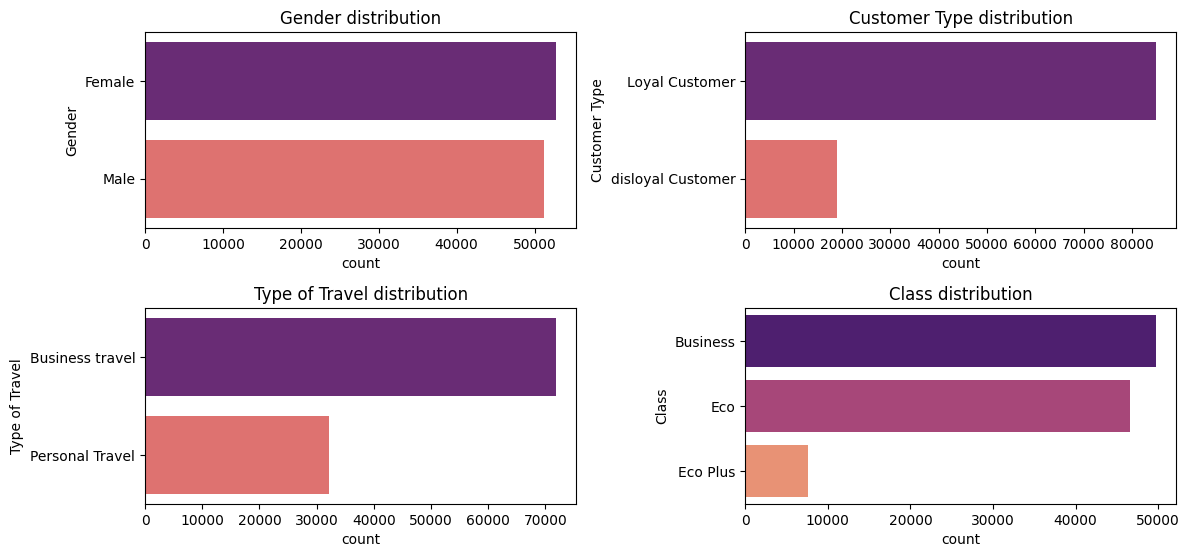

"\nUsing enumerate makes code cleaner, more readable, and reduces the need for manual index tracking.\nIt's especially useful for working with loops that require both values and indices,\nlike when handling lists, subplots, file processing, or GUIs. 🚀\n"

In [8]:
categorical_columns = x_train.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=x_train[col], order=x_train[col].value_counts().index, palette='magma')
    plt.title(f"{col} distribution")
    plt.tight_layout()
plt.show()
"""
Using enumerate makes code cleaner, more readable, and reduces the need for manual index tracking.
It's especially useful for working with loops that require both values and indices,
like when handling lists, subplots, file processing, or GUIs. 🚀
"""


# **Visualizing the target variable to check if there is imbalance**

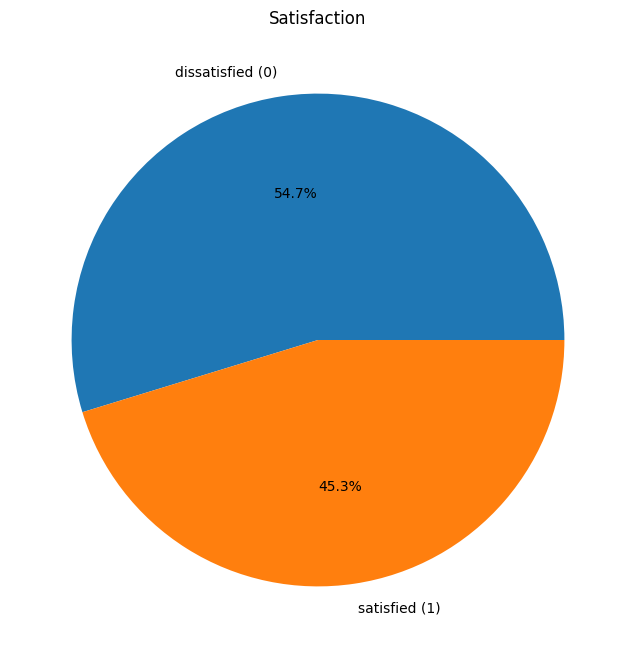

In [9]:
import matplotlib.pyplot as plt

# Generate the satisfaction data
satisfaction = data['satisfaction'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(
    satisfaction,
    labels=['dissatisfied (0)', 'satisfied (1)'],
    autopct='%1.1f%%'
)
plt.title('Satisfaction')
plt.show()

# **Step 1: Handle missing values**

In [10]:
#@title Missing value check
missing_values = x_train.isnull().sum()
print(missing_values)

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             313
dtype: int64


In [11]:
#@title handle missing values
def handle_missing_value(df):
    """
    This function handles missing values in a DataFrame.

    It fills numerical columns with the mean and categorical columns with the mode.

    Args:
        df (pandas.DataFrame): The DataFrame to handle missing values in.

    Returns:
        pandas.DataFrame: The DataFrame with missing values filled.
    """
    # Get numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    # Iterate through numerical columns and fill missing values with the mean
    for col in numerical_columns:
        if df[col].isnull().any(): # Checks if there is a missing value in each column
            df[col].fillna(value=df[f'{col}'].mean(), inplace=True)  # Fill with mean

    # Get categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    # Iterate through categorical columns and fill missing values with the mode
    for col in categorical_columns:
        if df[col].isnull().any():  # Check if column has any missing values
            df[col].fillna(value=df[f'{col}'].mode(), inplace=True)  # Fill with mode

    return df  # Return the modified DataFrame

# Apply the function to the training, development, and testing datasets
x_train = handle_missing_value(x_train)
x_dev = handle_missing_value(x_dev)
x_test = handle_missing_value(x_test)

/tmp/ipython-input-2150329784.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value=df[f'{col}'].mean(), inplace=True)  # Fill with mean
/tmp/ipython-input-2150329784.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

# **Step 2: Data Encoding**

In [12]:
#@title Replace 'satisfied' with 1 and 'dissatisfied' with 0 in the target variables
y_train.replace({'satisfied': 1, 'dissatisfied': 0}, inplace=True)
y_dev.replace({'satisfied': 1, 'dissatisfied': 0}, inplace=True)
y_test.replace({'satisfied': 1, 'dissatisfied': 0}, inplace=True)

/tmp/ipython-input-3753722231.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train.replace({'satisfied': 1, 'dissatisfied': 0}, inplace=True)
/tmp/ipython-input-3753722231.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_dev.replace({'satisfied': 1, 'dissatisfied': 0}, inplace=True)
/tmp/ipython-input-3753722231.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the fut

In [13]:
#@title One-Hot Encoding
def Data_Encoding(df):
  """
  Performs one-hot encoding on categorical columns in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing categorical columns.

  Returns:
      pandas.DataFrame: The DataFrame with categorical columns one-hot encoded.
  """
  # Identify categorical columns
  categorical_columns = df.select_dtypes(include=['object', 'category']).columns

  # Perform one-hot encoding using pandas' get_dummies
  dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True).astype(int)

  return dummies  # Return the DataFrame with one-hot encoded columns

# Apply one-hot encoding to the training, development, and testing datasets
x_train = Data_Encoding(x_train)
x_dev = Data_Encoding(x_dev)
x_test = Data_Encoding(x_test)

In [14]:
print(x_train.head())

       Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
21413   65              360             4                                  4   
7284    13             2991             1                                  5   
86080   58             1903             3                                  3   
59842   27             2813             4                                  4   
69486   34             2864             3                                  5   

       Food and drink  Gate location  Inflight wifi service  \
21413               4              4                      4   
7284                1              4                      5   
86080               3              3                      5   
59842               4              3                      3   
69486               4              4                      2   

       Inflight entertainment  Online support  Ease of Online booking  ...  \
21413                       3               4                 

In [15]:
# checking for target data types
print(y_train.dtypes)

int64


# **Step 3: Feature Normalization**

In [16]:
#@title Min-Max Normalization
def minmax_normalize(df, min_values=None, max_values=None):
    """
    Performs min-max normalization on a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame to normalize.
        min_values (pandas.Series, optional): Pre-calculated minimum values for each column. Defaults to None.
        max_values (pandas.Series, optional): Pre-calculated maximum values for each column. Defaults to None.

    Returns:
        tuple: A tuple containing the normalized DataFrame, minimum values, and maximum values.
    """
    # Use provided min and max values if given, otherwise calculate them from the DataFrame
    min_values = min_values if min_values is not None else df.min() # Contains the minimum value of each column in df.
    max_values = max_values if max_values is not None else df.max() # Contains the maximum value of each column in df.

    # Normalize the DataFrame using the min-max formula
    normalized_df = (df - min_values) / (max_values - min_values)

    return normalized_df, min_values, max_values  # Return normalized DataFrame, min_values(useful for applying the same transformation to other datasets), and max_values

In [17]:
#@title Apply min-max normalization to the datasets
# Normalize training data and store min/max values
x_train, min_value, max_value = minmax_normalize(x_train)
x_test, _, _ = minmax_normalize(x_test, min_values=min_value, max_values=max_value)
x_dev, _, _ = minmax_normalize(x_dev, min_values=min_value, max_values=max_value)

# both test/dev sets are normalized using the min/max value from the training set to ensure consistency and valid evaluation and to avoid data leakage.

# **Our Model Functions**

In [18]:
# Activation function
def sigmoid(z):  # It maps any real-valued number (output of the linear model) into a value between 0 and 1
  return (1 / (1 + np.exp(-z)))


def predict(X, weights, bias):  # Output: Predicted probabilities for each data point.
  logistic_Regression = np.dot(X, weights) + bias
  return sigmoid(logistic_Regression)


def compute_loss(y_true, y_pred): # evaluates how well the predictions match the actual values.
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# **MiniBatch-gradient descent**

In [19]:
#@title Mini-batch gradient descent function
def mini_batch(x_train, y_train, x_dev, y_dev , x_test, y_test, learning_rate, num_iterations ,
               batch_size,
               lambda_reg ):

  num_samples, num_features = x_train.shape # Dimensions of training data
  weights = np.zeros(num_features)  # Initializes the model's weights as a zero vector
  """
  The number of weights should be equal to the number of features
  because each feature in the input data needs a corresponding weight in the linear model.

  If x_train has a shape of (num_samples, num_features)
  ,the weight vector must have a shape of (num_features,) so that the dot product X @ w works correctly.

  If the number of weights were different from the number of features
  ,the multiplication would be mathematically invalid.

  If we had more or fewer weights than features
  ,we wouldn't be able to correctly model the relationship between inputs and outputs.
  """
  bias = 0

# lists to store the accuracies for each data set
  train_acc = []
  dev_acc = []
  test_acc = []

# lists to store the loss for training and development data sets
  train_loss = []
  dev_loss = []

  for i in range(num_iterations): # for epochs

    batch_indices = np.random.permutation(num_samples) # Randomly permutes the indices of the training data to shuffle it for each epoch.
    """
       ^  This means batch_indices contains all the indices of the training dataset but in a different, randomized order.

    The shuffled indices are used to rearrange x_train and y_train
    ,ensuring that the training data is shuffled at the beginning of each epoch.

    This helps improve the performance of mini-batch gradient descent
    by preventing the model from learning patterns based on the order of the data.

    """

    x_shuffled = x_train.iloc[batch_indices]
    y_shuffled = y_train.iloc[batch_indices]

    """
    x_shuffled is just x_train but with its rows rearranged according to the randomly shuffled indices in batch_indices.

    Why Use .iloc in Your Code?
      -It ensures that x_train and y_train are shuffled in the same way.
      -It reorders the data while keeping features and target values aligned.

    What Happens If You Only Shuffle x_train But Not y_train?
      -The features (x_train) will no longer correspond to the correct target labels (y_train).
      -This means that when your model tries to learn the relationship between features and labels, it's learning from incorrect pairings.
      As a result, the model won’t learn meaningful patterns and will perform poorly.
    """

    # Compute and store training loss
    y_train_pred = predict(x_train, weights, bias)  # Predictions on the entire training dataset using the current weights and bias.
    prediction_on_training = y_train_pred
    regularization_term = (lambda_reg / (2 * num_samples)) * np.sum(weights**2)  # L2 regularization term
    train_loss.append(compute_loss(y_train, y_train_pred))

    # Compute and store development loss
    y_dev_pred = predict(x_dev, weights, bias)
    regularization_term_dev = (lambda_reg / (2 * len(y_dev))) * np.sum(weights**2)
    dev_loss.append(compute_loss(y_dev, y_dev_pred))

    for start in range(0, num_samples, batch_size):     # for batch
      """
      In mini-batch gradient descent
     ,we update the model parameters (weights and bias) after processing each mini-batch
      """
      end = min(start + batch_size, num_samples)  # calculate the last index of the mini batch
      # Select the features and labels for the current batch.
      x_batch = x_shuffled[start:end]
      y_batch = y_shuffled[start:end]

      y_pred = predict(x_batch, weights, bias) # Predictions for the current mini-batch.
      """
      We compute y_pred for every mini-batch because it is needed for gradient updates in mini-batch training
      ,making the model more efficient and improving convergence.

      -w represents the weights before an update (pre-mini-batch in MBGD or pre-epoch in BGD).
      -After computing gradients, w is updated and used for the next iteration.
      -The updated w influences subsequent training steps, gradually improving model performance.
      """
      # weight and bias update
      weights -= learning_rate * ((1 / len(y_batch)) * np.dot(x_batch.T, (y_pred - y_batch)) + (lambda_reg / num_samples) * weights)
      bias -= learning_rate * (1 / len(y_batch)) * np.sum(y_pred - y_batch)  # the bias won't affect by L2 regularization

    #compute and store accuracies
    y_train_pred = predict(x_train, weights, bias) >= 0.5
    train_acc.append(np.mean(y_train_pred == y_train)) # Compares predicted labels with true labels and calculates the mean (accuracy).

    y_dev_pred = predict(x_dev, weights, bias) >= 0.5
    dev_acc.append(np.mean(y_dev_pred == y_dev))

    y_test_pred = predict(x_test, weights, bias) >= 0.5
    test_acc.append(np.mean(y_test_pred == y_test))

  return weights, bias, train_acc, dev_acc, test_acc, train_loss, dev_loss, prediction_on_training

# **Calling the model**

In [20]:
#@title initializing hyperparameters
learning_rate = 0.1
epochs = 5
batch_size = 64
lambda_reg = 1

weights, bias, train_acc, dev_acc, test_acc, train_loss, dev_loss, pred = mini_batch(
        x_train, y_train, x_dev, y_dev, x_test, y_test,
        learning_rate, epochs, batch_size, lambda_reg
    )
print(y_train)
print(pred)

21413     1
7284      0
86080     0
59842     0
69486     0
         ..
128106    1
103694    1
860       0
15795     1
121958    1
Name: satisfaction, Length: 103904, dtype: int64
[0.74869229 0.09777954 0.71376843 ... 0.04506133 0.63089222 0.87790134]


# **Accuracy**

In [21]:
#@title Display final accuracy results
print(f"\nFinal Training Accuracy: {train_acc[-1]:.4f}") # print the last train_acc value
print(f"Final Development Accuracy: {dev_acc[-1]:.4f}") # print the last dev_acc value
print(f"Final Test Accuracy: {test_acc[-1]:.4f}") # print the last test_acc value


Final Training Accuracy: 0.8341
Final Development Accuracy: 0.8329
Final Test Accuracy: 0.8336


# **KNN Model**

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  # For classification
from sklearn.neighbors import KNeighborsRegressor   # For regression

knn = KNeighborsClassifier(n_neighbors=15) # defining the model
knn.fit(x_train, y_train) # fitting / training the model
y_pred = knn.predict(x_test) # prediction on the test set
y_pred
accuracy = accuracy_score(y_test, y_pred) # calculating the accuracy
print(f"Accuracy: {accuracy:.4f}") # printing the accuracy

Accuracy: 0.9236


In [23]:
correct_predictions = np.sum(y_pred == y_test)
print(f"correct predictions: {correct_predictions}")

print(y_pred)
print(y_test)

correct predictions: 11996
[0 0 1 ... 1 1 1]
43571     0
41261     0
27169     1
65060     1
70197     0
         ..
73063     0
82846     0
84395     1
122829    1
91645     1
Name: satisfaction, Length: 12988, dtype: int64


# **Decision Tree**

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [25]:
tree = DecisionTreeClassifier(random_state = 20)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9383


In [26]:
print(y_pred)
print(y_test)

[0 0 1 ... 1 1 1]
43571     0
41261     0
27169     1
65060     1
70197     0
         ..
73063     0
82846     0
84395     1
122829    1
91645     1
Name: satisfaction, Length: 12988, dtype: int64


# **Notes**

In [27]:
"""
DataFrame.count: Count number of non-NA/null observations.
DataFrame.max: Maximum of the values in the object.
DataFrame.min: Minimum of the values in the object.
DataFrame.mean: Mean of the values.
DataFrame.std: Standard deviation of the observations.
DataFrame.select_dtypes: Subset of a DataFrame including/excluding
columns based on their dtype.


- In Forward Fill with axis [zero], the Nan values are filled based on the previous row.
- In Backward Fill with axis [zero], the Nan values are filled based on the next row.

- In Forward Fill with axis [one], the Nan values are filled based on the previous column.
- In Backward Fill with axis [one], the Nan values are filled based on the next column.

df.dropna(axis = 0 or 1)  will drop the Nan values in the specified axis
    """

'\nDataFrame.count: Count number of non-NA/null observations.\nDataFrame.max: Maximum of the values in the object.\nDataFrame.min: Minimum of the values in the object.\nDataFrame.mean: Mean of the values.\nDataFrame.std: Standard deviation of the observations.\nDataFrame.select_dtypes: Subset of a DataFrame including/excluding\ncolumns based on their dtype.\n\n\n- In Forward Fill with axis [zero], the Nan values are filled based on the previous row.\n- In Backward Fill with axis [zero], the Nan values are filled based on the next row.\n\n- In Forward Fill with axis [one], the Nan values are filled based on the previous column.\n- In Backward Fill with axis [one], the Nan values are filled based on the next column.\n\ndf.dropna(axis = 0 or 1)  will drop the Nan values in the specified axis\n    '

In [28]:
print(data.index)
range(data.shape[0])
df_temp = data.loc[::2, :]
print(df_temp.index)
print(range(df_temp.shape[0]))


RangeIndex(start=0, stop=129880, step=1)
RangeIndex(start=0, stop=129880, step=2)
range(0, 64940)


In [29]:
data.iloc[: , :7]
print(type('Departure/Arrival time convenient'))

<class 'str'>


In [30]:
data[data.loc[:,'Departure/Arrival time convenient'] > data.loc[:, 'Departure/Arrival time convenient'].mean()]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
175,satisfied,Male,Loyal Customer,24,Personal Travel,Eco,3219,0,3,0,...,3,3,4,2,5,5,5,3,93,86.0
176,satisfied,Male,Loyal Customer,12,Personal Travel,Eco,2794,0,3,0,...,3,3,3,2,4,2,2,3,14,1.0
177,satisfied,Female,Loyal Customer,39,Personal Travel,Eco,2274,0,3,0,...,1,2,5,2,1,2,2,2,0,0.0
178,satisfied,Male,Loyal Customer,46,Personal Travel,Eco,2179,0,3,0,...,3,5,1,5,1,3,2,5,0,0.0
179,satisfied,Male,Loyal Customer,55,Personal Travel,Eco,1656,0,3,0,...,4,4,3,1,3,3,3,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129873,satisfied,Female,disloyal Customer,63,Personal Travel,Eco,1942,5,5,4,...,3,3,5,2,5,3,5,3,7,NaN
129874,satisfied,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,5,5,...,2,2,3,5,3,5,4,2,5,0.0
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0


In [31]:
# data.fillna(value=(The values), limit=) The limit decides how many Nan values to replace in each column

In [32]:
transposed_describe = data.describe().T
print(transposed_describe)

print(transposed_describe.loc["Age","mean"])

                                      count         mean          std   min  \
Age                                129880.0    39.427957    15.119360   7.0   
Flight Distance                    129880.0  1981.409055  1027.115606  50.0   
Seat comfort                       129880.0     2.838597     1.392983   0.0   
Departure/Arrival time convenient  129880.0     2.990645     1.527224   0.0   
Food and drink                     129880.0     2.851994     1.443729   0.0   
Gate location                      129880.0     2.990422     1.305970   0.0   
Inflight wifi service              129880.0     3.249130     1.318818   0.0   
Inflight entertainment             129880.0     3.383477     1.346059   0.0   
Online support                     129880.0     3.519703     1.306511   0.0   
Ease of Online booking             129880.0     3.472105     1.305560   0.0   
On-board service                   129880.0     3.465075     1.270836   0.0   
Leg room service                   129880.0     3.48

In [33]:
#@title Data Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
"""
features_scaled is a NumPy array returned by scaler.fit_transform().
NumPy arrays don’t have column names, so without specifying column names, Pandas would assign default numerical indices

Why Use StandardScaler?
  -Standardizing features ensures that they are on the same scale, which helps machine learning models perform better.
  -Many ML algorithms, such as logistic regression, SVMs, and neural networks, are sensitive to the scale of input data.
"""


scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(x_train)
data_scaled = pd.DataFrame(data=features_scaled, columns=['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']) # providing the column names beacuse the variable features_scaled contain the scaled values without column names
print(features_scaled, "/n /n /n /n ")
print(data_scaled)

[[0.74358974 0.04492754 0.8        ... 1.         1.         0.        ]
 [0.07692308 0.42623188 0.2        ... 1.         1.         0.        ]
 [0.65384615 0.26855072 0.6        ... 0.         0.         0.        ]
 ...
 [0.73076923 0.16753623 0.2        ... 1.         1.         0.        ]
 [0.19230769 0.16565217 0.6        ... 1.         1.         0.        ]
 [0.52564103 0.02826087 1.         ... 0.         1.         0.        ]] /n /n /n /n 
        satisfaction    Gender  Customer Type  Age  Type of Travel  Class  \
0           0.743590  0.044928            0.8  0.8             0.8    0.8   
1           0.076923  0.426232            0.2  1.0             0.2    0.8   
2           0.653846  0.268551            0.6  0.6             0.6    0.6   
3           0.256410  0.400435            0.8  0.8             0.8    0.6   
4           0.346154  0.407826            0.6  1.0             0.8    0.8   
...              ...       ...            ...  ...             ...    ...   
1038

# **Logistic Regression**

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

model = LogisticRegression()
model.fit(x_train, y_train)  # The model is being trained
loss = log_loss(y_test, model.predict_proba(x_test))
print(f"Log Loss: {loss:.4f}")
proba = model.predict_proba(x_test) # used to get the probability for each data point belonging to each class
print(proba)

y_model_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_model_pred)
print(f"Accuracy: {accuracy:.4f}")

Log Loss: 0.3835
[[0.98653457 0.01346543]
 [0.97775366 0.02224634]
 [0.0803289  0.9196711 ]
 ...
 [0.28809688 0.71190312]
 [0.01025306 0.98974694]
 [0.02329781 0.97670219]]
Accuracy: 0.8379


In [35]:
print(y_pred[:10])
print(y_test.iloc[:10])

[0 0 1 1 0 1 0 0 0 1]
43571     0
41261     0
27169     1
65060     1
70197     0
115498    1
81309     0
74271     0
55977     0
114506    1
Name: satisfaction, dtype: int64


# **Support Vector Machine**

In [36]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear',C=0.001) # C is a regularization parameter that controls the trade-off between maximizing the margin and minimizing classification errors.
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

"""
#Large C (e.g., 10, 100, 1000)
  -The model tries to classify every training data point correctly.
  -It results in a more complex decision boundary (low bias, high variance).
  -This increases the risk of overfitting.
#Small C (e.g., 0.1, 0.01, 0.001)
  -The model allows some misclassifications to keep the decision boundary smoother.
  -It prioritizes a larger margin over perfect classification.
  -This increases the risk of underfitting but improves generalization.
"""

Accuracy: 0.8383


'\n#Large C (e.g., 10, 100, 1000)\n  -The model tries to classify every training data point correctly.\n  -It results in a more complex decision boundary (low bias, high variance).\n  -This increases the risk of overfitting.\n#Small C (e.g., 0.1, 0.01, 0.001)\n  -The model allows some misclassifications to keep the decision boundary smoother.\n  -It prioritizes a larger margin over perfect classification.\n  -This increases the risk of underfitting but improves generalization.\n'